In [64]:
import requests
from bs4 import BeautifulSoup
import time
from time import sleep
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Находим акции из индекса и расчитываем их доходность

In [65]:
# Получаем доступ к странице с компонентами индекса Хэнг Сэнг
def skam(link):
  # создаем правдоподобные заголовки
  HEADERS = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
      "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
      "Accept-Language": "en-US,en;q=0.5",
      "Accept-Encoding": "gzip, deflate",
      "Connection": "keep-alive",
      "Upgrade-Insecure-Requests": "1",
      "Sec-Fetch-Dest": "document",
      "Sec-Fetch-Mode": "navigate",
      "Sec-Fetch-Site": "none",
      "Sec-Fetch-User": "?1",
      "Cache-Control": "max-age=0",
  }

  # получаем доступ к сайту
  response_months = requests.get(
  url=link,
  params={
      'api_key': 'c861f7ae-ac04-4c7e-8630-e87d73ed71d2',
      'url': 'https://quotes.toscrape.com/',
  },
  timeout=5,
  headers=HEADERS)
  return response_months

In [66]:
# Извлекаем айпи акций с сайта
def stocks_parser(link):
  # составляем дерево сайта
  tree_months = BeautifulSoup(skam(link).content, 'html.parser')
  stock_info = tree_months.find_all('a', {'class' : 'loud-link fin-size-small svelte-wdkn18'})
  stock_api = [i.text.strip() for i in stock_info]

  return stock_api

In [67]:
# находим айпи акций из индекса
stocks_ip = stocks_parser('https://finance.yahoo.com/quote/%5EHSI/components/')
stocks_ip = stocks_ip[:-3]
len(stocks_ip)

30

In [68]:
def stock_info(ip):
  hsi_ticker = yf.Ticker(ip)
  # извлекаем историческую инфу об акции с 2016 по 2024 год с промежутком в 3 месяца
  df = hsi_ticker.history(start="2010-01-01", interval="3mo").reset_index()
  return df

In [69]:
def stocks_prof(ip):
  df = stock_info(ip)

  df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')  # оставляем только дату
  df['Date'] = pd.to_datetime(df['Date']) # Преобразуем колонку Date в datetime
  df.set_index('Date', inplace=True)

  df_grouped = df.groupby(df.index.year).agg({'Close': 'last', 'Dividends': 'sum'}) # Группируем данные по годам: в качестве цены оставляем цену на конец года, а дивиденды ссумируем
  df_grouped['Profitability_div'] = df_grouped['Dividends'] / df_grouped['Close']

  return df_grouped


Фомируем таблицу доходностей акций из индекса по годам:

In [70]:
dataframes = []
for ip in stocks_ip:
  df_grouped = stocks_prof(ip)
  df_grouped = pd.DataFrame(data = [df_grouped['Profitability_div'].values.tolist()[1:]], columns = df_grouped.index.values.tolist()[1:], index = [ip]) # создадим табличку с доходностью по годам
  dataframes.append(df_grouped)

df = pd.concat(dataframes)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0241.HK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0992.HK,0.025681,0.021447,0.027392,0.038504,0.031261,0.061912,0.081416,0.087737,0.047753,0.070963,0.032875,0.040561,0.056404,0.043829,0.000000
6098.HK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003532,0.002876,0.006277,0.026406,0.044511,0.059170
2628.HK,0.032758,0.022612,0.013333,0.008271,0.014938,0.038934,0.026544,0.014619,0.027694,0.012062,0.056774,0.065426,0.059641,0.055255,0.000000
2269.HK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1109.HK,0.034930,0.032396,0.015450,0.029661,0.031860,0.038294,0.037898,0.034263,0.044314,0.043776,0.039126,0.046238,0.053346,0.069813,0.046208
1398.HK,0.058309,0.065627,0.070762,0.095090,0.100856,0.139127,0.083562,0.058080,0.066888,0.070901,0.071199,0.080390,0.095180,0.081494,0.000000
1093.HK,0.064361,0.135805,0.000000,0.017328,0.015118,0.019115,0.013487,0.007648,0.012821,0.011450,0.022239,0.020042,0.025225,0.041705,0.022082
2319.HK,0.007946,0.008392,0.010455,0.004570,0.008117,0.017700,0.011922,0.004334,0.006665,0.007994,0.005006,0.006871,0.013748,0.023474,0.040798
1044.HK,0.035022,0.030310,0.030678,0.033673,0.032018,0.051180,0.045347,0.041560,0.049851,0.054399,0.060349,0.075008,0.049846,0.066070,0.029289


До 2020 года по некоторым акциям не отображается информация, потому что они ещё не входили в индекс на тот момент.

## Формируем портфели Dogs of the Dow

1. Для каждого года (начиная с 2011) отберём 10 акций с самой большой дививдендной доходностью на конец предыдущего года
2. Сформируем портфели и расчитаем их доходность, для каждого портфеля зададим параметр - N (количество акций в портфеле). Параметр принимает значения 2, 4, 6, 10, 12
3. Ребалансировка портфелей будет в конце каждого года

In [71]:
def portfolio(n):
  years = df.columns.values.tolist()
  portfolio_dogs = pd.DataFrame(index=years[1:-1]) #задаём пустой портфель

  for year in range(1, len(years)-1):
    # отберём 10 акций с наибольше дивидендной доходностью за прошлый год
    df_sorted = df.sort_values(by=years[year-1], ascending=False)
    stocks_portfolio = df_sorted.index.values.tolist()[:n]

    sum_income = 0
    # расчитываем текущую годовую доходность каждой акции
    for ip in stocks_portfolio:
      df_stock_prof = stocks_prof(ip)

      df_stock_prof['Price_change'] = df_stock_prof['Close'].diff() # изменение стоимости акции за год
      df_stock_prof['Close_last_year'] = df_stock_prof['Close'].shift(1) # создаем столбец с ценой закрытия в прошлом году (это и есть цена покупки)

      # рассчитываем доходность к цене закрытия прошлого года
      df_stock_prof['Income_to_Last_Year_Price'] = (df_stock_prof['Price_change'] + df_stock_prof['Dividends'])/df_stock_prof['Close_last_year']
      # отберём доходность за интересующий нас год
      df_stock_prof_y = df_stock_prof.loc[years[year], ['Income_to_Last_Year_Price']]
      # сумируем доходности по акциям за год
      sum_income += df_stock_prof_y

    # создаем таблицу портфеля
    column_name = f'Income_{n}'
    portfolio_dogs.at[years[year], column_name] = sum_income[0] / n
  return portfolio_dogs

In [72]:
dataframes_1 = []
for n in range(2, 14, 2):
  dataframes_1.append(portfolio(n))

portfolios_dogs = pd.concat(dataframes_1, axis=1)
portfolios_dogs

,Income_2,Income_4,Income_6,Income_8,Income_10,Income_12
2011,0.068264,-0.070171,0.018876,-0.020993,0.036304,0.014889
2012,0.208643,0.241752,0.162914,0.136725,0.077734,0.118699
2013,0.345508,0.181753,0.077096,0.060660,0.039280,0.024781
2014,0.217294,0.199187,0.220310,0.265565,0.264891,0.258212
2015,-0.166082,-0.107659,-0.074705,-0.127307,-0.147021,-0.143527
2016,0.408816,0.542327,0.376714,0.323400,0.293574,0.286095
2017,0.244882,0.293544,0.222641,0.220381,0.210638,0.225767
2018,0.629123,0.356152,0.267312,0.239509,0.195379,0.202773
2019,-0.040843,-0.042960,-0.031138,-0.065999,-0.039104,-0.047784
2020,0.067844,0.360473,0.227799,0.201949,0.165278,0.135726


## Визуализация

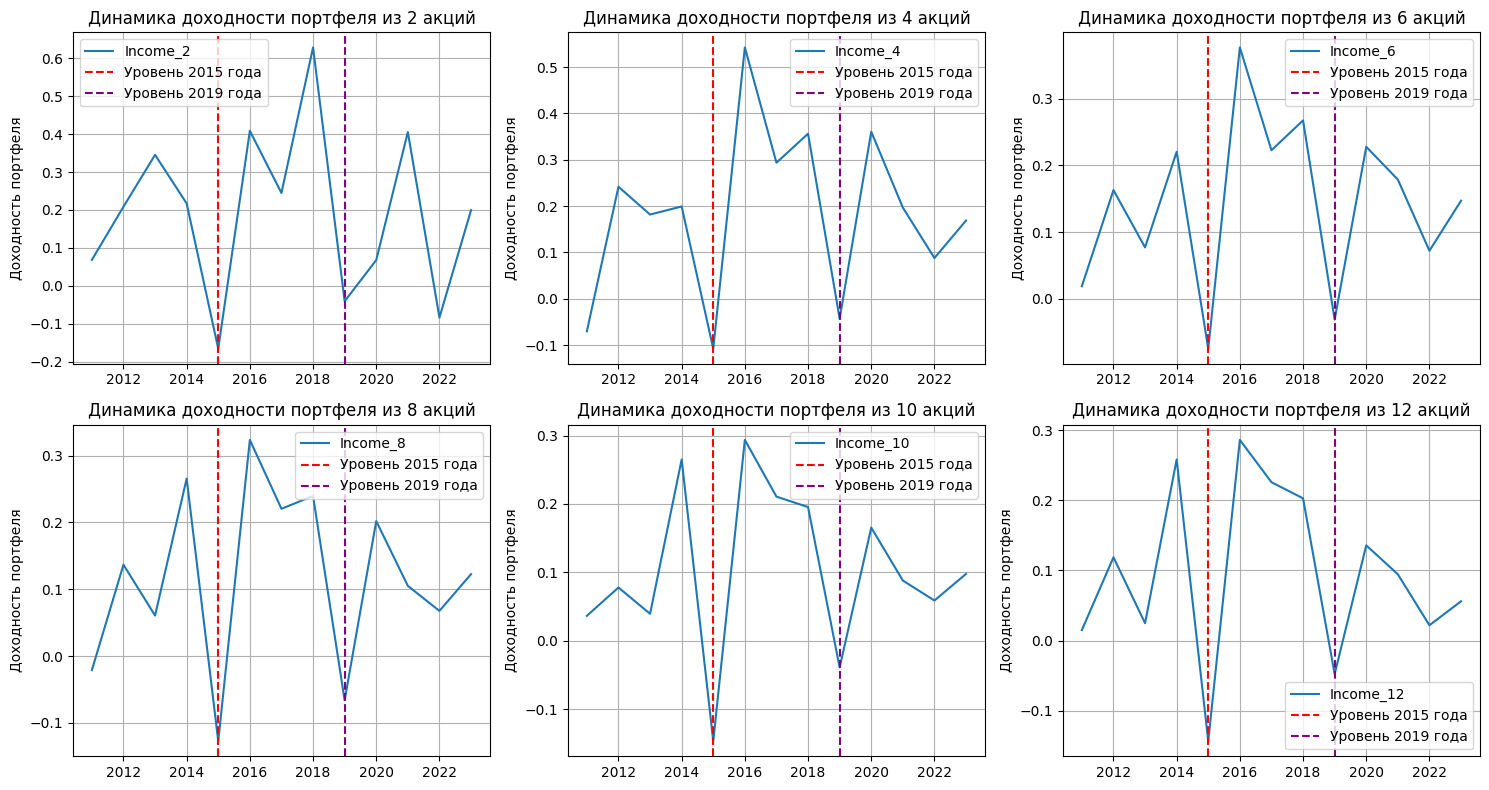

In [73]:
title_list = ['Динамика доходности портфеля из 2 акций', 'Динамика доходности портфеля из 4 акций', 'Динамика доходности портфеля из 6 акций', 'Динамика доходности портфеля из 8 акций', 'Динамика доходности портфеля из 10 акций', 'Динамика доходности портфеля из 12 акций']
# colors = ['blue', 'green', 'hotpink', 'purple', 'orange', 'brown']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=False)
for idx, ax in enumerate(axes.flat):
    portfolios_dogs.iloc[:, idx].plot(ax=ax, title=title_list[idx], ylabel='Доходность портфеля', grid=True)
    ax.axvline(x=2015, color='r', linestyle='--', label='Уровень 2015 года')
    ax.axvline(x=2019, color='purple', linestyle='--', label='Уровень 2019 года')
    ax.legend()

plt.tight_layout()
plt.show()


По графикам заметно, что доходности очень сильно колеблются. Наименьшие значения (отрицательные) достигаются в 2015 и 2019 года.

# Оценка портфелей

Вычислим Риск портфеля, Sharpe Ratio и Treynor Ratio за весь период времени

Для Treynor Ratio вычислим доходность индекса HSI по годам

In [74]:
hsi_prof = stocks_prof('^HSI')['Close'].pct_change()
hsi_prof = hsi_prof[2:-1]
hsi_prof

Date
2011   -0.071040
2012    0.061817
2013   -0.007963
2014    0.086979
2015   -0.230081
2016    0.242194
2017    0.299232
2018   -0.071699
2019   -0.087425
2020    0.109081
2021   -0.216258
2022   -0.128872
2023   -0.165496
Name: Close, dtype: float64

In [75]:
risk_free = 0.015

portfolio_std = np.std(portfolios_dogs).values
portfolio_mean = np.mean(portfolios_dogs, axis = 0).values

hsi_prof_std = np.std(hsi_prof)
hsi_prof_corr = portfolios_dogs.corrwith(hsi_prof)
hsi_prof_cov = hsi_prof_corr * portfolio_std * hsi_prof_std

In [76]:
portfolios_dogs.loc['STD'] = portfolio_std
portfolios_dogs.loc['Sharpe Ratio'] = (portfolio_mean - risk_free) / portfolio_std
portfolios_dogs.loc['Treynor Ratio'] = (portfolio_mean - risk_free) / (hsi_prof_cov / hsi_prof_std**2)
portfolios_dogs

,Income_2,Income_4,Income_6,Income_8,Income_10,Income_12
2011,0.068264,-0.070171,0.018876,-0.020993,0.036304,0.014889
2012,0.208643,0.241752,0.162914,0.136725,0.077734,0.118699
2013,0.345508,0.181753,0.077096,0.060660,0.039280,0.024781
2014,0.217294,0.199187,0.220310,0.265565,0.264891,0.258212
2015,-0.166082,-0.107659,-0.074705,-0.127307,-0.147021,-0.143527
2016,0.408816,0.542327,0.376714,0.323400,0.293574,0.286095
2017,0.244882,0.293544,0.222641,0.220381,0.210638,0.225767
2018,0.629123,0.356152,0.267312,0.239509,0.195379,0.202773
2019,-0.040843,-0.042960,-0.031138,-0.065999,-0.039104,-0.047784
2020,0.067844,0.360473,0.227799,0.201949,0.165278,0.135726
